# Etude de cas - Analyse des performances d'√©tudiants

Source du projet -> https://platform.stratascratch.com/data-projects/student-performance-analysis

Le but de ce projet est d'explorer les donn√©es des √©l√®ves pour d√©couvrir des informations qui pourraient aider √† comprendre et √† pr√©dire la r√©ussite des √©l√®ves au cours de diff√©rentes p√©riodes acad√©miques. En tant que contributeur, vous explorerez la relation entre les notes des √©l√®ves et une myriade de facteurs d√©mographiques, sociaux et scolaires. Votre analyse aura un impact direct sur notre capacit√© √† identifier et √† traiter les influences cl√©s sur les performances des √©l√®ves.

## Les t√¢ches :

#### Cr√©er des visualisations de donn√©es :

- G√©n√©rer des histogrammes pour observer la distribution des notes (G1, G2, G3) et d'autres facteurs num√©riques comme l'√¢ge et le temps d'√©tude.
- Construire des diagrammes en bo√Æte pour rep√©rer les valeurs aberrantes et comprendre la r√©partition des donn√©es.
- Utiliser des graphiques √† barres pour comparer les notes moyennes dans diff√©rentes cat√©gories telles que le sexe, le niveau d'√©ducation des parents et l'acc√®s √† Internet.

Vos visualisations doivent aider √† mettre en √©vidence les tendances et les mod√®les qui peuvent influencer les performances des √©l√®ves.

#### R√©aliser des tests statistiques :

- Effectuez des tests du chi carr√© pour √©tudier l'association entre les variables cat√©gorielles (par exemple, le sexe, l'acc√®s √† Internet) et les notes des √©l√®ves. Par exemple, existe-t-il une diff√©rence statistique dans les notes des √©l√®ves ayant des niveaux d'√©ducation parentale diff√©rents ?
- Appliquez des tests t pour comparer les notes moyennes entre deux groupes diff√©rents, tels que les √©l√®ves des zones urbaines et rurales.
- Utilisez l'analyse de r√©gression pour pr√©dire les notes finales en fonction de divers facteurs tels que le temps d'√©tude et les √©checs pass√©s.

Documentez vos r√©sultats, interpr√©tez les valeurs p et discutez de la signification statistique de vos r√©sultats.

## Objectifs :

- Analyse de corr√©lation : D√©terminez les facteurs les plus fortement corr√©l√©s aux notes des √©l√®ves.
- Mod√©lisation pr√©dictive : Cr√©ez un mod√®le capable de pr√©dire la note finale d'un √©l√®ve en fonction de son parcours et de ses activit√©s scolaires.
- G√©n√©ration d'id√©es : Fournissez des informations exploitables aux √©coles pour les aider √† am√©liorer les r√©sultats des √©l√®ves en fonction de vos r√©sultats.

In [1]:
#Importation des outils
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, probplot

In [2]:
#importation des donn√©es pour les √©tudiants en math√©matique + cr√©ation d'une colonne subject qui sera utile pour la fusion
math_students = pd.read_csv('datasetclients/students/student-mat.csv', sep=";")
math_students['subject'] = "Maths"
math_students.columns = math_students.columns.str.lower()

#importation des donn√©es pour les √©tudiants en portugais + cr√©ation d'une colonne subject qui sera utile pour la fusion
portuguese_students = pd.read_csv('datasetclients/students/student-por.csv', sep=";")
portuguese_students['subject'] = "Portugues"
portuguese_students.columns = portuguese_students.columns.str.lower()

#Fusion des deux dataframe en un seul
df = pd.concat([math_students, portuguese_students])
df

school sex  age address famsize pstatus  medu  fedu      mjob      fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... freetime goout  dalc  walc  health absences  g1  g2  g3    subject  
0    ...        3     4     1     1       3        6   5   6   6      Maths  
1    ...        3     3     1     1       3        4   5   5   6      Maths  
2    ...        3     2     2     3       3       10   7   8  10      Maths  
3    ...        2     2     1     1       5        2  15  14  15      Maths  
4    ...        3     2     1     2       5        4   6  10  10      Maths  
..   ...      ...   ...   ...   ...     ...      ...  ..  ..  ..        ...  
644  ...        4     2     1     2       5        4  10  11  10  Portugues  
645  ...        3     4     1     1       1        4  15  15  16  Portugues  
646  ...        1     1     1     1       5        6  11  12   9  Portugues  
647  ...        4     5     3     4       2        6  10  10  10  Portugues  
648  ...        4     1     3     4       5        4  10  11  11  Portugues  

[1044 rows x 34 columns]

## Explication des donn√©es

Source -> https://www.kaggle.com/datasets/whenamancodes/student-performance

- **school** : L'√©cole o√π se trouve l'√©tudiant
- **sex** : Le sexe de l'√©tudiant
- **age** : L'√¢ge de l'√©tudiant
- **address** : L'adresse de l'√©tudiant (U -> Urbain ; R -> Rural)
- **famsize** : La taille de la famille (LE3 -> Moins de 3 ; GT3 -> Plus de 3)
- **Pstatus** : Cohabitation des parents (T -> Ensemble ; A -> S√©par√©s)
- **Medu** : Niveau d'√©ducation de la m√®re (0 -> Aucun ; 1 -> CM1 max ; 2 - Brevet max ; 3 - BAC max ; 4 - Au dessus du BAC)
- **Fedu** : Niveau d'√©ducation du p√®re (0 -> Aucun ; 1 -> CM1 max ; 2 - Brevet max ; 3 - BAC max ; 4 - Au dessus du BAC)
- **Mjob** : Travail de la m√®re
- **Fjob** : Travail du p√®re
- **reason** : Raison de rejoindre l'√©cole (close to 'home', school 'reputation', 'course' preference or 'other')
- **guardian** : Gardien de l'√©tudiant (M√®re, P√®re, Autre)
- **traveltime** : Trajet maison -> √©cole (1 -> -15mn ; 2 -> Entre 15 et 30mn ; 3 -> Entre 30mn et 1h ; 4 -> 1h et plus)
- **studytime** : Temps d'√©tude hebdomadaire (1 -> -2h ; 2 -> 2 √† 5h ; 3 -> 5 √† 10h ; 4 -> 10h et plus)
- **failures** : Nombre de classes rat√©es avant d'√™tre ici
- **schoolsup** : Support √©ducatif en plus (Oui ou non)
- **famsup** : Support √©ducatif issu de la famille (Oui ou non)
- **paid** : Classes suppl√©mentaires sur les sujets Math ou Portuguais
- **activities** : Activit√©s extrascolaires (oui ou non)
- **nursery** : A √©t√© √† l'√©cole maternelle (oui ou non)
- **higher** : Souhaite faire plus d'√©tudes (oui ou non)
- **internet** : A internet √† la maison (oui ou non)
- **romantic** : Est en couple (oui ou non)
- **famrel** : Qualit√© des relation familiales (1 (mauvais) √† 5 (tr√®s bon))
- **freetime** : Temps libre apr√®s l'√©cole (1 (tr√®s peu) - 5 (√©norm√©ment))
- **goout** : Sorties entre amis (1 (tr√®s peu) - 5 (√©norm√©ment))
- **Dalc** : Alcool en semaine (1 (tr√®s peu) - 5 (√©norm√©ment))
- **Walc** : Alcool le weekend (1 (tr√®s peu) - 5 (√©norm√©ment))
- **health** : Niveau de sant√© actuel (1 (mauvais) √† 5 (tr√®s bon))
- **absences** : Nombre d'absences √† l'√©cole
- **subject** : La mati√®re (Maths ou Portugues)

Concernant les notes : 

- **G1** ; **G2** ; **G3** : Notes (/20) pour la premi√®re, seconde et derni√®re p√©riode scolaire

## Description des donn√©es + Nettoyage

Le premier point va √™tre de regrouper et d√©crire les donn√©es, on va √©galement nettoyer au besoin (mettre tous les noms de colonne int√©gralement en minuscule)

In [3]:
print("Recherche de valeurs nulles")
print("----------------------")
print(df.isna().sum())
print("")
print("----------------------")
print("Description rapide des donn√©es")
print("----------------------")
print(df.describe())
print("")
print("----------------------")
print("Information rapide des donn√©es")
print("----------------------")
print(df.info())

Recherche de valeurs nulles
----------------------
school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
subject       0
dtype: int64

----------------------
Description rapide des donn√©es
----------------------
               age         medu         fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.00000

In [4]:
df.columns = df.columns.str.lower()
df.head()

school sex  age address famsize pstatus  medu  fedu     mjob      fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  dalc  walc  health absences  g1  g2  g3 subject  
0        3     4     1     1       3        6   5   6   6   Maths  
1        3     3     1     1       3        4   5   5   6   Maths  
2        3     2     2     3       3       10   7   8  10   Maths  
3        2     2     1     1       5        2  15  14  15   Maths  
4        3     2     1     2       5        4   6  10  10   Maths  

[5 rows x 34 columns]

## Visualisation des donn√©es

G√©n√©rer des histogrammes pour observer la distribution des notes (G1, G2, G3) et d'autres facteurs num√©riques comme l'√¢ge et le temps d'√©tude.

In [5]:
df_viz = df.copy()

#Fonction pour grouper les notes/sujets entre eux
def group_grades(df, df_col, subject_col=None, grade_range=21):
    
    #On cr√©e une plage compl√®te de note (de 0 √† 20)
    full_grades = pd.DataFrame({df_col: range(grade_range)})
    
    #Grouper et compter les notes entre elles
    grade_count = df.groupby(df_col).size().reset_index(name="count")
    
    #Je merge le tableau avec le tableaude notes avec un left join. L'id√©e est de r√©cup√©rer 
    #√©galement les notes absentes, et de mettre 0 au compteur
    grade_count = full_grades.merge(grade_count, on=df_col, how="left").fillna(0)
    grade_count["count"] = grade_count["count"].astype(int)

    #Si j'ai un sujet, alors je veux grouper par notes et sujet
    if subject_col:
        #Je r√©cup√®re les sujets uniques
        unique_subject = df[subject_col].unique()
        
        #Je cr√©e un tableau qui liste tous les couples mati√®res-notes possible entre 0 et 20
        grade_subject = pd.MultiIndex.from_product(
            [range(grade_range), unique_subject], names=[df_col, subject_col]
        ).to_frame(index=False)
        
        #Je regroupe le tout
        grade_count_subject = df.groupby([df_col, subject_col]).size().reset_index(name="count")
        
        grade_count_subject = grade_subject.merge(grade_count_subject, on=[df_col, subject_col], how="left").fillna(0)
        grade_count_subject["count"] = grade_count_subject["count"].astype(int)
        
        return grade_count, grade_count_subject

    return grade_count

g1, g1_subject = group_grades(df_viz, "g1", "subject")
g2, g2_subject = group_grades(df_viz, "g2", "subject")
g3, g3_subject = group_grades(df_viz, "g3", "subject")

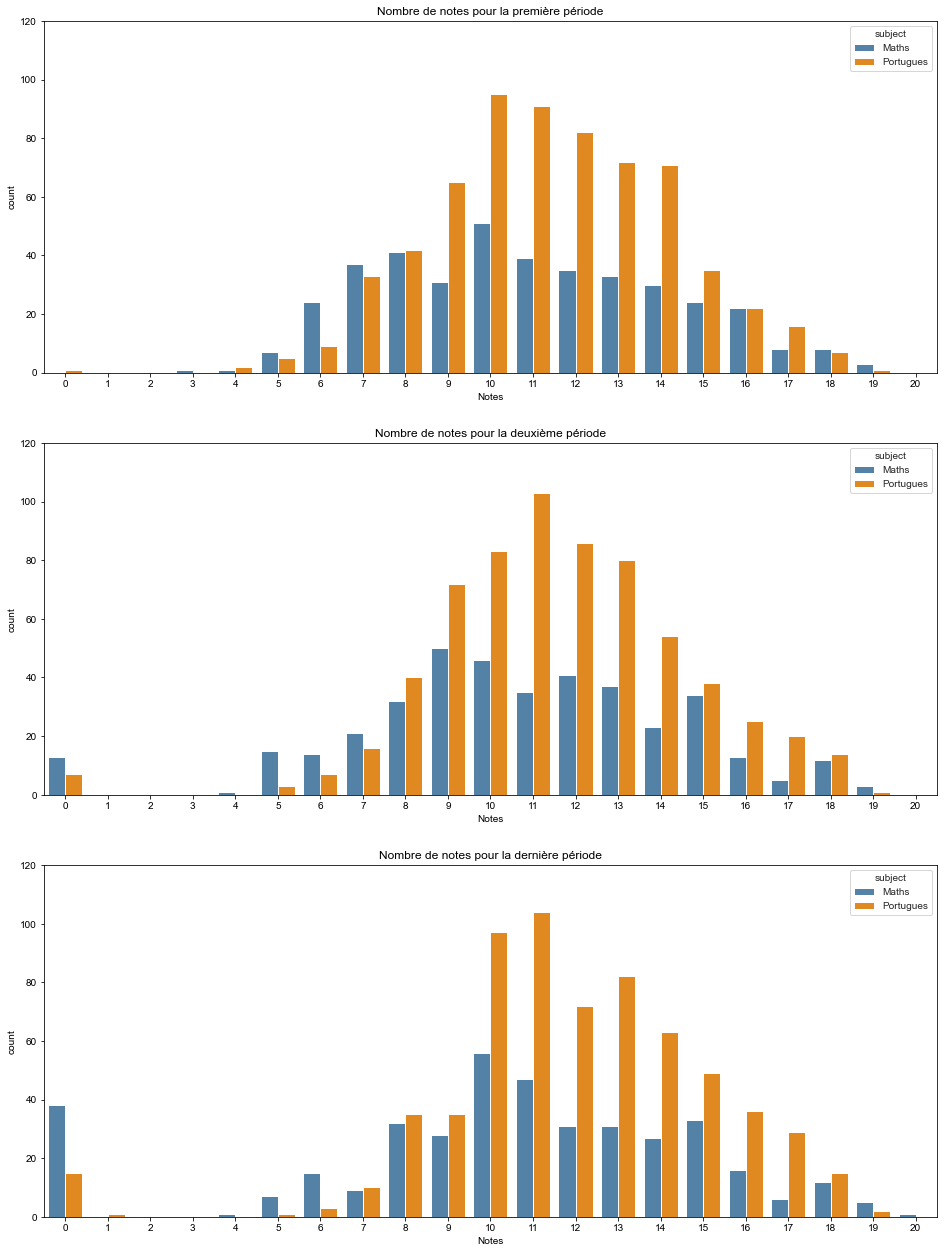

In [6]:
#Cr√©ation des plots

fig, axes = plt.subplots(3, 1, figsize=(16, 22))
axes = axes.ravel()

sns.set_style("whitegrid")

#D√©finition des informations : liste des donn√©es (les groupements de notes par mati√®res ; les couleurs et les noms de p√©riode)
data = [g1_subject, g2_subject, g3_subject]
subject_colors = {'Maths': 'steelblue', 'Portugues': 'darkorange'}
periods = ["premi√®re", "deuxi√®me", "derni√®re"]

#Pour chaque √©l√©ment dans data, j'affiche un barplot qui compte le nombre de notes, tri√© par mati√®res
for i in range(3):
    sns.barplot(data=data[i], x=f"g{i+1}", y="count", ax=axes[i], hue="subject", palette=subject_colors)
    axes[i].set_xlabel("Notes")
    axes[i].set_title(f"Nombre de notes pour la {periods[i]} p√©riode")
    axes[i].set_ylim(0, 120)

### A ce moment l√†, je me rends compte que je cr√©e des barplots au lieu d'histogrammes, je vais laisser l√† parce que je suis fier de ma fonction de groupby

Maintenant, je vais cr√©er les vrais histogrames et y ajouter les boxplots

In [7]:
columns = ['g1', 'g2', 'g3', 'studytime', 'age', 'absences']

sns.set_style("whitegrid")

#Fonction de cr√©ation d'histogrammes et de boxplots
#Param√®tres : le dataframe, la colonne √† v√©rifier, la mati√®re
def create_hist_box(data, col, subject):
    #On d√©finit la taille du subplot gr√¢ce √† la longueur du tableau, donc 8 lignes, et 2 colonnes
    #La taille de la figure est de 12 et 4*8 donc 32
    fig, axes = plt.subplots(len(col), 2, figsize=(12, 4 * len(col)))
    
    for i, column in enumerate(col):
        sns.histplot(data=data, x=column, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"Histogramme de la colonne {column} pour la mati√®re {subject}")
        
        sns.boxplot(data=data, x=column, ax=axes[i, 1])
        axes[i, 1].set_title(f"Boxplot de la colonne {column} pour la mati√®re {subject}")
    
    plt.tight_layout()

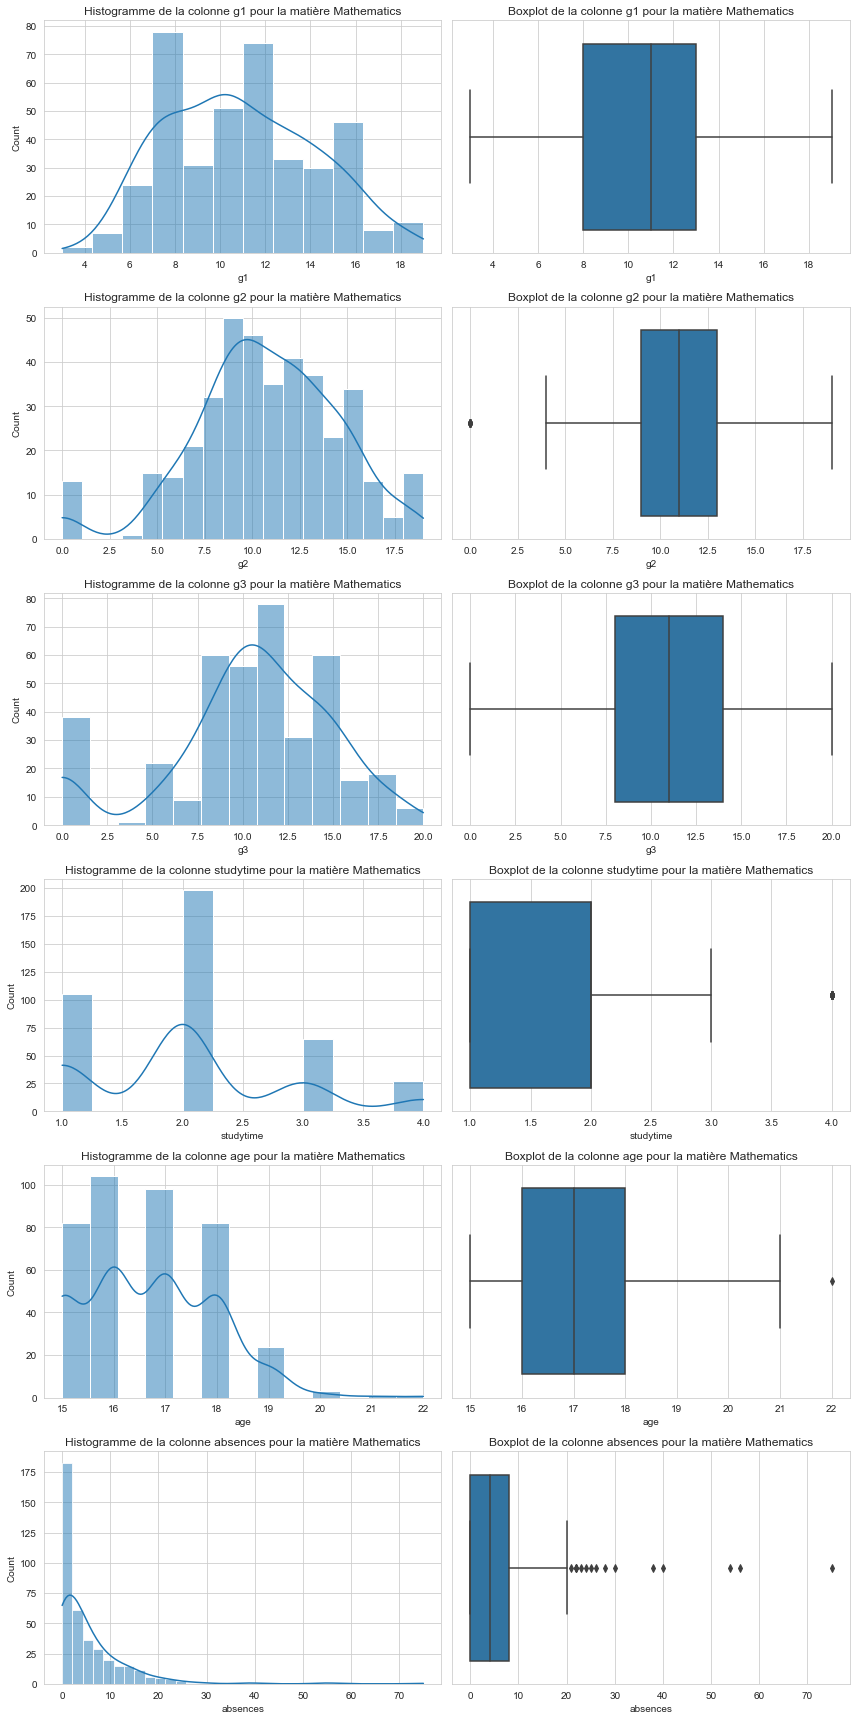

In [8]:
create_hist_box(math_students, columns, "Mathematics")

### Retour sur les plots math√©matiques 

- C√¥t√© notes, les r√©sultats sont distribu√©s de fa√ßon plut√¥t normale avec quelques donn√©es aberrantes en G2/G3
- Les apprenants ont entre 15 et 19 ans, avec quelques personnes de 20 √† 22 ans
- Tr√®s peu d'abscences en math√©matiques
- Le temps d'√©tudes est dans la moyenne, avec quelques personnes travaillant plus de 10h/semaine

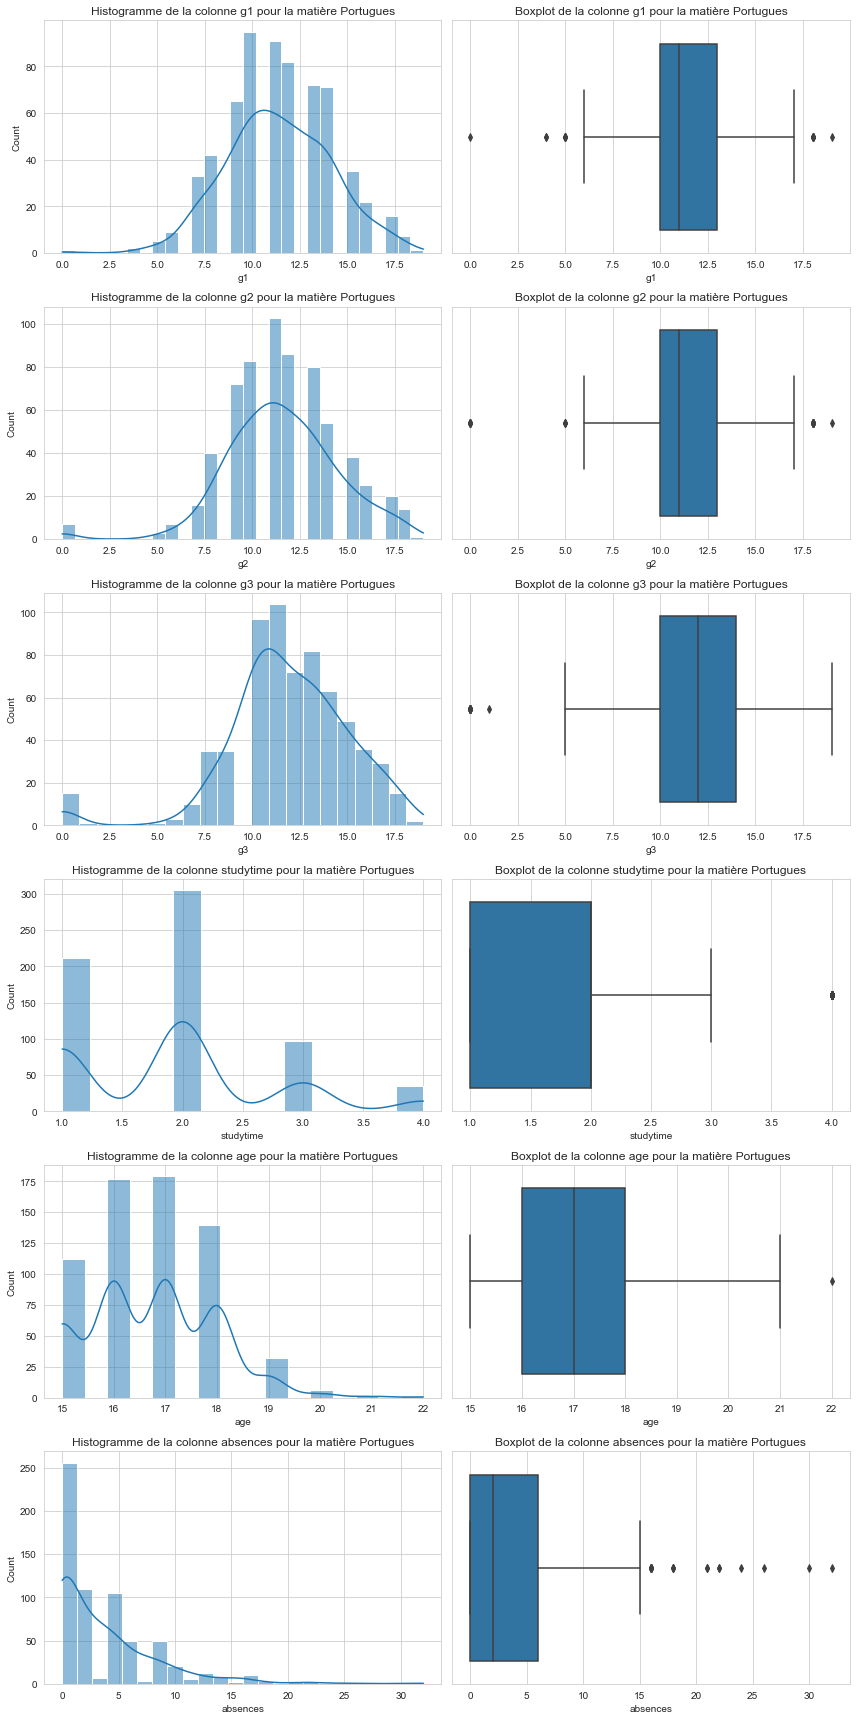

In [9]:
create_hist_box(portuguese_students, columns, "Portugues")

### Retour sur les plots portuguais 

- C√¥t√© notes, les notes semblent meilleures que les math√©matiques, avec cependant moins de participants
- L'√¢ge est √©galement identique en terme de distribution, avec des apprenants majoritairement entre 15 et 19 ans
- Tr√®s peu d'abscences, similaire aux math√©matiques
- Le temps d'√©tudes est √©galement √©quivalent au math√©matiques, m√™me si il a plus tendance √† pencher vers les 2 √† 5h de travail hebdomadaire

## Comparaison des moyennes suivant certains crit√®res (sexe, acc√®s √† Internet, √©ducation des parents...)

**Explications de la fonction mel_data** : 

- Regroupement par cat√©gorie (groupby) : Elle regroupe les donn√©es par une colonne cat√©gorielle (ex. sex) et calcule la moyenne des notes g1, g2 et g3.

Exemple de r√©sultat apr√®s groupby pour la colonne sex :

| sex | g1   | g2   | g3   |
|-----|------|------|------|
| F   | 12.0 | 14.0 | 13.0 |
| M   | 10.0 | 11.0 | 12.0 |

- Transformation (melt) : Elle transforme les colonnes g1, g2, g3 en une colonne nomm√©e Exam. Cela facilite la cr√©ation de graphiques.

Exemple de r√©sultat apr√®s melt :

| sex | Exam | Average Score |
|-----|------|---------------|
| F   | g1   | 12            |
| F   | g2   | 14            |
| F   | g3   | 13            |
| M   | g1   | 10            |
| M   | g2   | 11            |
| M   | g3   | 12            |

- Conversion de type : Les scores moyens sont convertis en entiers (int64).

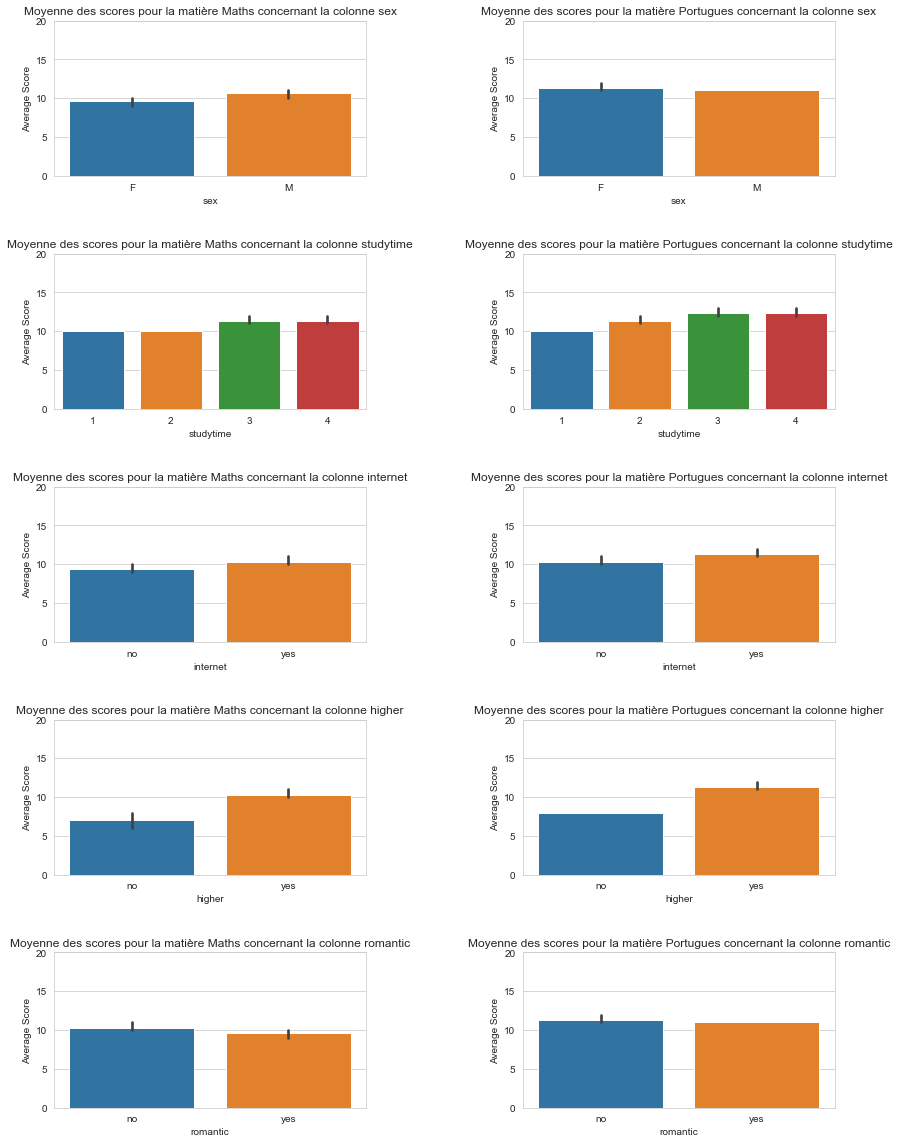

In [22]:
columns = ['sex', 'studytime', 'internet', 'higher', 'romantic']
subjects = ['Maths', 'Portugues']

#Explication de la fonction plus haut
def mel_data(data, col):
    dt = data.groupby(col)[['g1', 'g2', 'g3']].mean().reset_index()
    dt_melted = dt.melt(id_vars=col, var_name='Exam', value_name='Average Score')
    dt_melted['Average Score'] = dt_melted['Average Score'].astype('int64')
    return dt_melted

#Cr√©ation d'un object result_col qui liste les sujets, j'aurais quelque chose du genre 
#{"Maths": {}, "Portugues": {}}
result_col = {sub: {} for sub in subjects}

#Pour chaque sujet dans le tableau de sujets,
#J'alimente result_col pour chaque sujet dans le tableau columns

#result_col[sub][col] = mel_data(df[df['subject'] == sub], col) -> Applique la fonction mel_data
#Le premier argument est notre dataframe de base, mais je v√©rifie si la colonne "subject" correspond bien √† ma valeur "sub"
#Donc soit Maths soit Portugues. En deuxi√®me param√®tre, j'ai la colonne en it√©ration
for sub in subjects:
    for col in columns:
        result_col[sub][col] = mel_data(df[df['subject'] == sub], col)

fig, axes = plt.subplots(len(columns), 2, figsize=(14, 4 * len(columns)))

#Pour chaque sujet, et chaque colonne √† l'int√©rieur de result_col, je cr√©e un barplot
#la donn√©e est la colonne dans result_col, je vais chercher result_col[subject][col], en x j'ai la colonne choisie, et en y
#La colonne "average score" cr√©√©e par mel_data. Les axes sont g√©r√©s par ma boucle pour afficher les mati√®res cote √† cote
for i, subject in enumerate(result_col):
    for j, col in enumerate(result_col[subject]):
        sns.barplot(data=result_col[subject][col], x=col, y="Average Score", ax=axes[j, i])
        axes[j, i].set_title(f"Moyenne des scores pour la mati√®re {subject} concernant la colonne {col}")
        axes[j, i].set_ylim(0, 20)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

## Retour des barplots

- Sexe : Pas de grosses diff√©rences entre hommes et femmes
- Studytime : Sans surprise, un temps d'√©tude plus √©lev√© m√®ne a des moyennes plus √©lev√©es
- Internet : Pas une √©norme diff√©rence de moyennes pour les apprenants ayant internet √† la maison ou pas, √ßa peut s'expliquer par la pr√©sence d'internet dans l'√©tablissement scolaire ?
- Higher : Les moyennes sont bien plus √©lev√©es si l'apprenant souhaite continuer, ce qui semble √©galement logique
- Romantic : Aucune diff√©rence si l'apprenant est en couple ou non, voire une moyenne tr√®s l√©g√®rement plus √©lev√©e si l'apprenant est c√©libataire

---

## Test statistiques

- Effectuez des tests du chi carr√© pour √©tudier l'association entre les variables cat√©gorielles (par exemple, le sexe, l'acc√®s √† Internet) et les notes des √©l√®ves. Par exemple, existe-t-il une diff√©rence statistique dans les notes des √©l√®ves ayant des niveaux d'√©ducation parentale diff√©rents ?
- Appliquez des tests t pour comparer les notes moyennes entre deux groupes diff√©rents, tels que les √©l√®ves des zones urbaines et rurales.
- Utilisez l'analyse de r√©gression pour pr√©dire les notes finales en fonction de divers facteurs tels que le temps d'√©tude et les √©checs pass√©s.

In [27]:
from scipy.stats import chi2_contingency

cols = ['sex', 'studytime', 'internet', 'higher', 'romantic', 'medu', 'fedu', 'schoolsup', 'famsup', 'activities', 'health']

def chisquaretest(dataset, col1, col2):
    #Cr√©ation d'une table de contingence :
    contain_table = pd.crosstab(dataset[col1], dataset[col2])
    chi2, p, dof, expected = chi2_contingency(contain_table)

    print(f"Test Chi¬≤ pour la colonne {column}")
    print(f"Chi¬≤: {chi2}")
    print(f"p-value: {p}")
    
    #Dans le Chi¬≤, si la valeur p est inf√©rieure √† 0.05 (en g√©n√©ral c'est la valeur de base mais elle reste arbitraire)
    #Alors il y a une relation entre les deux colonnes
    if p < 0.05:
        print("/!\ Forte relation !")

### Explication sur la table de contingence (pour ma compr√©hension perso)

La table de contingence va croiser les donn√©es entre elles, et compter les valeurs pour chaque donn√©es (exemple, pour la note g3 de 6/20, on compte le nombre de personne avec et sans internet), √ßa va permettre de voir si il y a un relation entre le fait d'avoir internet et la note g3. Par exemple si beaucoup de personnes n'ont pas internet parmis les personnes ayant des mauvaises notes & tr√®s peu parmi ceux qui ont des bonnes notes & que parmis ceux qui ont de bonnes notes, quasiment tous ont internet, on peut estimer que ces variables sont li√©es
D'o√π l'int√©r√™t de faire une table de contingence pour un Chi¬≤

In [26]:
#Exemple de table de contingence
pd.crosstab(math_students['internet'], math_students['g3'])

g3        0   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  \
internet                                                                       
no         8   0   1   5   3   3   6  12   6   8   4   5   2   0   1   2   0   
yes       30   1   6  10   6  29  22  44  41  23  27  22  31  16   5  10   5   

g3        20  
internet      
no         0  
yes        1

### Chi¬≤ Test pour les math√©matiques

In [12]:
for column in cols:
    chisquaretest(math_students, column, 'g3')
    print("")

Test Chi¬≤ pour la colonne sex
Chi¬≤: 20.094983484728708
p-value: 0.26939988682273464

Test Chi¬≤ pour la colonne studytime
Chi¬≤: 59.43163233108963
p-value: 0.19543507371441438

Test Chi¬≤ pour la colonne internet
Chi¬≤: 17.94941194705821
p-value: 0.3920390653260132

Test Chi¬≤ pour la colonne higher
Chi¬≤: 24.38095284133272
p-value: 0.1094482874216139

Test Chi¬≤ pour la colonne romantic
Chi¬≤: 30.172481594103168
p-value: 0.02512766406485856
/!\ Forte relation !

Test Chi¬≤ pour la colonne medu
Chi¬≤: 75.09602000056746
p-value: 0.25938557528758116

Test Chi¬≤ pour la colonne fedu
Chi¬≤: 69.1210614560398
p-value: 0.43930355096435997

Test Chi¬≤ pour la colonne schoolsup
Chi¬≤: 32.51747698036442
p-value: 0.012967250942184287
/!\ Forte relation !

Test Chi¬≤ pour la colonne famsup
Chi¬≤: 13.691883206082325
p-value: 0.688779619694134

Test Chi¬≤ pour la colonne activities
Chi¬≤: 15.476362071640207
p-value: 0.5612107675941844

Test Chi¬≤ pour la colonne health
Chi¬≤: 69.21650199423279
p-v

D'apr√®s le retour du test Chi¬≤, il y aurait une forte relation entre le fait d'√™tre en couple et le fait de r√©ussir ses examens, m√™me chose pour le support de la famille

In [13]:
for column in cols:
    chisquaretest(portuguese_students, column, 'g3')
    print("")

Test Chi¬≤ pour la colonne sex
Chi¬≤: 21.910210365202236
p-value: 0.14611445184701047

Test Chi¬≤ pour la colonne studytime
Chi¬≤: 92.70710243112966
p-value: 0.00011439590319883216
/!\ Forte relation !

Test Chi¬≤ pour la colonne internet
Chi¬≤: 24.474147027291785
p-value: 0.07964798902533757

Test Chi¬≤ pour la colonne higher
Chi¬≤: 106.69706844113018
p-value: 1.8975421776329405e-15
/!\ Forte relation !

Test Chi¬≤ pour la colonne romantic
Chi¬≤: 17.00330498225206
p-value: 0.3853832688699261

Test Chi¬≤ pour la colonne medu
Chi¬≤: 116.85186784971884
p-value: 6.147265010886306e-05
/!\ Forte relation !

Test Chi¬≤ pour la colonne fedu
Chi¬≤: 107.86468915647478
p-value: 0.0005011153421490013
/!\ Forte relation !

Test Chi¬≤ pour la colonne schoolsup
Chi¬≤: 24.302749235136933
p-value: 0.08309749991579357

Test Chi¬≤ pour la colonne famsup
Chi¬≤: 19.479702828533775
p-value: 0.2445734719811948

Test Chi¬≤ pour la colonne activities
Chi¬≤: 21.629573448176266
p-value: 0.15555985667214905

Tes

Concernant le portuguais, on a plus de relations pour les r√©sultats :
- Le temps d'√©tude influence beaucoup la r√©ussite
- Le fait de vouloir faire de plus grandes √©tudes
- Le niveau d'√©tude initial des parents 

## Pr√©dictions

- Analyse de corr√©lation : D√©terminez les facteurs les plus fortement corr√©l√©s aux notes des √©l√®ves.
- Mod√©lisation pr√©dictive : Cr√©ez un mod√®le capable de pr√©dire la note finale d'un √©l√®ve en fonction de son parcours et de ses activit√©s scolaires.

In [14]:
#Voir la correlation entre les notes finales et le reste (heatmap)

plt.figure(figsize=(16,10))
corr = df.corr()[['g3']]

sns.heatmap(corr)

<AxesSubplot:>

La heatmap permet de d√©finir que seulement la ligne g1 et g2 peuvent √™tre int√©ressantes pour une pr√©diction des apprenants

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#y est ma variable d√©pendante (ou ma cible) c'est la valeur que je cherche √† pr√©dire
#X sont mes variables explicatives: Ce sont les variables qui sont utilis√©es pour expliquer ou pr√©dire la variable cible. 
#Elles influencent ou sont cens√©es avoir un effet sur la variable cible.
X = df[['g1', 'g2']] 
y = df['g3'] 

#Je divise mes variables en ensemble de test et d'entrainement. 20% des donn√©es servent √† tester, le reste √† l'entra√Ænement
#Le random_state est utile pour assurer que le test est reproductible avec les m√™me valeurs
#On peut l'enlever en cas r√©el ?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Cr√©ation du mod√®le avec la LinearRegression de sklearn + entrainement avec les sets xy_train gr√¢ce √† la fonction fit()
model = LinearRegression()
model.fit(X_train, y_train)

#Une fois que le mod√®le de r√©gression lin√©aire a √©t√© entra√Æn√© sur les donn√©es d'entra√Ænement (X_train, y_train)
#il peut maintenant √™tre utilis√© pour faire des pr√©dictions sur de nouvelles donn√©es. 
#Pour √ßa, on utilisera X_test, l'ensemble de test qui n'a pas √©t√© utilis√© pendant l'entra√Ænement du mod√®le.
#Le r√©sultat de la m√©thode predict est un tableau de pr√©dictions pour chaque exemple dans X_test. 
#Ces pr√©dictions sont stock√©es dans la variable y_pred. Ce tableau contient les valeurs estim√©es de la variable cible (ùëî3)
#pour chaque observation dans l'ensemble de test, selon la relation lin√©aire trouv√©e par le mod√®le pendant l'entra√Ænement.
y_pred = model.predict(X_test)

#On finit par √©valuer le mod√®le en r√©cup√©rant la MSE (Mean Squared Error) qui 
#mesure l'erreur quadratique moyenne entre les valeurs r√©elles (y_test) et les valeurs pr√©dites (y_pred
#L'objectif est d'avoir un MSE le plus faible possible, qui assure la qualit√© du mod√®le
mse = mean_squared_error(y_test, y_pred)

#Le R¬≤ (coefficient de d√©termination) mesure la proportion de la variance de la variable cible expliqu√©e par le mod√®le. 
#Il varie de 0 √† 1 : un R¬≤ proche de 1 indique que le mod√®le explique bien les donn√©es, 
#tandis qu'un R¬≤ proche de 0 sugg√®re que le mod√®le ne parvient pas √† expliquer la variance des donn√©es
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.978726475816173
R^2 Score: 0.8073370738614303


Donc par rapport √† mes donn√©es, un R¬≤ score de 0.807 indique un plut√¥t bon r√©sultat (environ 80,73% de mes donn√©es sont expliqu√©es par le mod√®le)
Le MSE de 2.92 semble √©galement plut√¥t performant

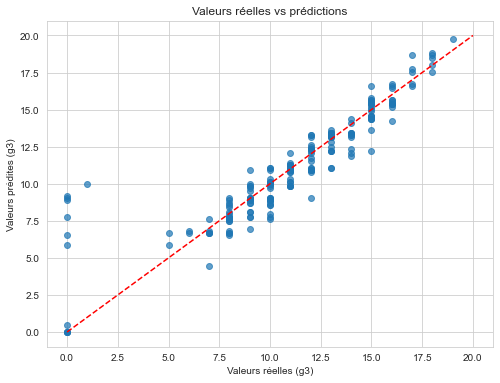

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Ligne d'identit√©
plt.xlabel("Valeurs r√©elles (g3)")
plt.ylabel("Valeurs pr√©dites (g3)")
plt.title("Valeurs r√©elles vs pr√©dictions")
plt.show()

In [32]:
#Test du mod√®le sur diff√©rentes notes :

notes = [[10, 13],[14, 8],[15, 17],[14, 19],[17, 18]]

predicted_g3_all = model.predict(notes)

for i, pred in enumerate(predicted_g3_all, 1):
    print(f"√âtudiant {i} - Note estim√©e (g3) : {pred:.2f}")

√âtudiant 1 - Note estim√©e (g3) : 12.84
√âtudiant 2 - Note estim√©e (g3) : 8.69
√âtudiant 3 - Note estim√©e (g3) : 17.40
√âtudiant 4 - Note estim√©e (g3) : 19.15
√âtudiant 5 - Note estim√©e (g3) : 18.66


Au vue des r√©sultats, il semblerait m√™me que la valeur G2 a plus d'impact sur le mod√®le que la valeur G1 ?

## Conclusion

Au vue des r√©sultats des test, il peut √™tre int√©ressant pour l'√©cole d'accentuer son support des √©tudiants, les r√©sultats semblent probants pour les math√©matiques.
On peut √©galement encourager la recherche d'√©tudes sup√©rieures ou d'emploi, il y a une forte correlation et de bien meilleurs r√©sultats pour un apprenant qui sait o√π il va ensuite.

Cr√©er des programmes sp√©cifiques, des conf√©rences ou masterclass pour les √©tudiants leurs seront tr√®s b√©n√©fique. Accentuer l'apport que peuvent avoir les parents aussi.